# EDA Sleep Health

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 01. 데이터 수집 및 로드

In [2]:
df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 02. 데이터 구조 및 변수 이해

In [5]:
print(df.shape) # 891행 12열
print(df.dtypes)
print()
df.info()

(374, 13)
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non

## 03. 데이터 요약 및 기술통계

In [4]:
df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [6]:
print(df.value_counts('Person ID'), end='\n\n')
print(df.value_counts('Gender'), end='\n\n')
print(df.value_counts('Age'), end='\n\n')
print(df.value_counts('Occupation'), end='\n\n')
print(df.value_counts('Sleep Duration'), end='\n\n')
print(df.value_counts('Quality of Sleep'), end='\n\n')
print(df.value_counts('Physical Activity Level'), end='\n\n')
print(df.value_counts('Stress Level'), end='\n\n')
print(df.value_counts('BMI Category'), end='\n\n')
print(df.value_counts('Blood Pressure'), end='\n\n')
print(df.value_counts('Heart Rate'), end='\n\n')
print(df.value_counts('Daily Steps'), end='\n\n')
print(df.value_counts('Sleep Disorder'), end='\n\n')

Person ID
1      1
247    1
256    1
255    1
254    1
      ..
123    1
122    1
121    1
120    1
374    1
Name: count, Length: 374, dtype: int64

Gender
Male      189
Female    185
Name: count, dtype: int64

Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: count, dtype: int64

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Sleep Duration
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8.1    15
8.4    14
7.3    14
8.0    13
8.5    13

## 04. 결측치, 이상치 탐지(혈압, 수면장애 - 무호흡증, 불면증)

In [ ]:
df.isna().sum()

In [ ]:
# df.duplicated('PassengerId').sum()

In [9]:
# df['Age'].plot(kind='box')
# plt.show()

## 05. ✅변수분포 시각화
### 수치형 변수 : Box Plot으로 분포와 이상치 시각화, 변수 분포 정규성 확인용 히스토그램, 히트맵
### 범주형 변수 : Donut Pie Chart로 비율 시각화
### 주요 변수 (의미 있어 보이는) : Stress Level 분포, 조사 대상 연령 분포, BMI Category 분포 시각화

In [52]:
# 한국어 처리
import matplotlib
import matplotlib.font_manager as fm

# Window
font_path = "C:\\Windows\\Fonts\\malgun.ttf"
# Mac
# font_path = "/System/Library/Fonts/Supplemental/Arial Unicode.ttf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

## 수치형 변수 Box Plot

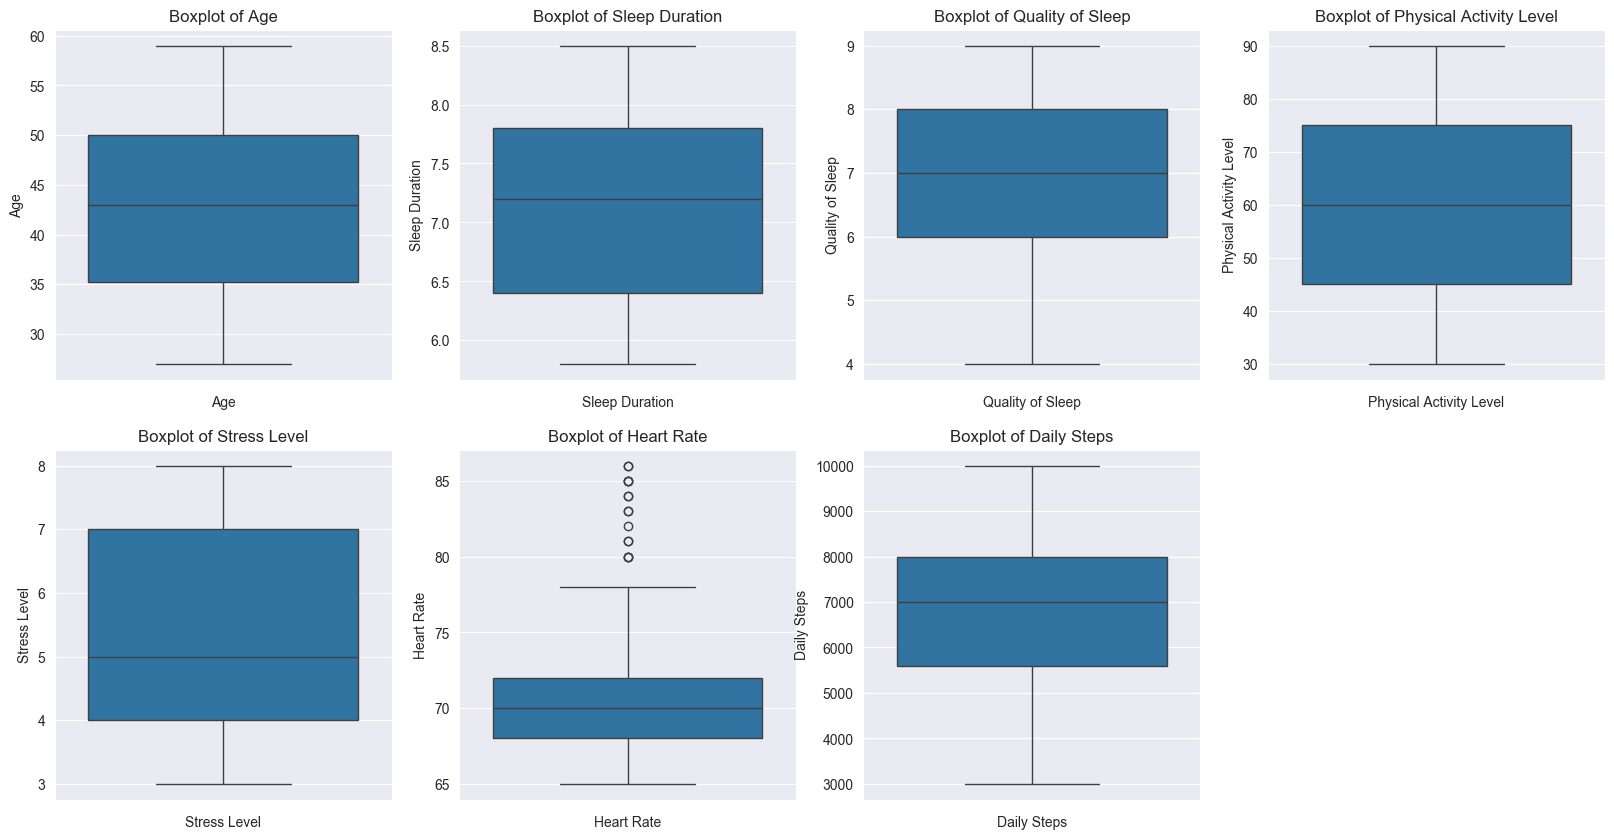

In [33]:
# Person ID drop 했는데, 전처리 했으면 수정 필요!
# 수치형 데이터 분리
num_cols = df.select_dtypes(include='number').columns.drop("Person ID")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 4개씩 2줄
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(
        y=df[col],
        ax=axes[i]
    )
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(col)

 # 사용하지 않는 subplot 제거
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()


## 수치형 변수 히스토그램

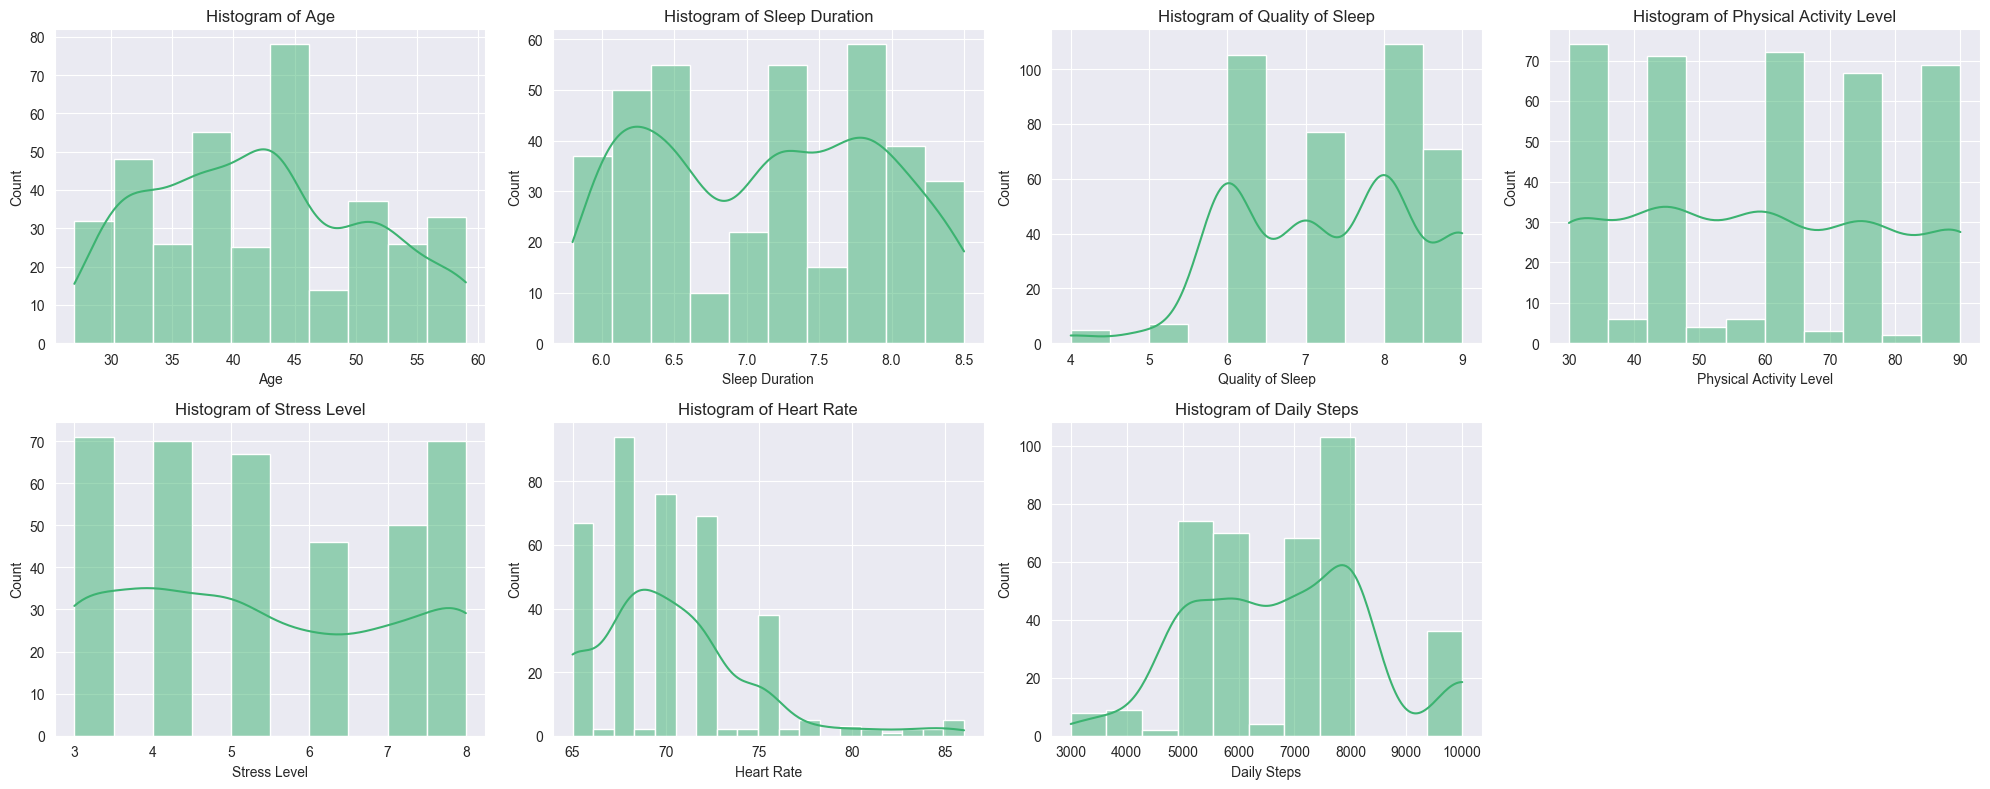

In [55]:
n = len(num_cols)
rows = (n // 4) + (n % 4 > 0)
plt.figure(figsize=(20, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 4, i)
    sns.histplot(df[col], kde=True, color='mediumseagreen')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

## 수치형 변수 히트맵

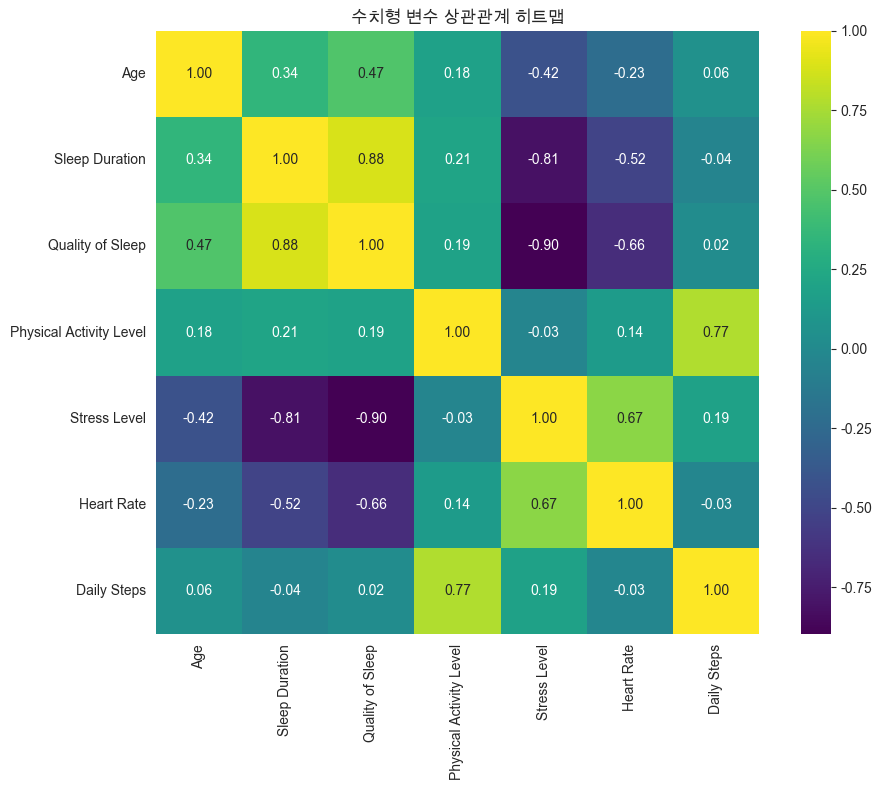

In [57]:
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title("수치형 변수 상관관계 히트맵")
plt.tight_layout()
plt.show()

## 범주형 변수 Donut Pie Chart

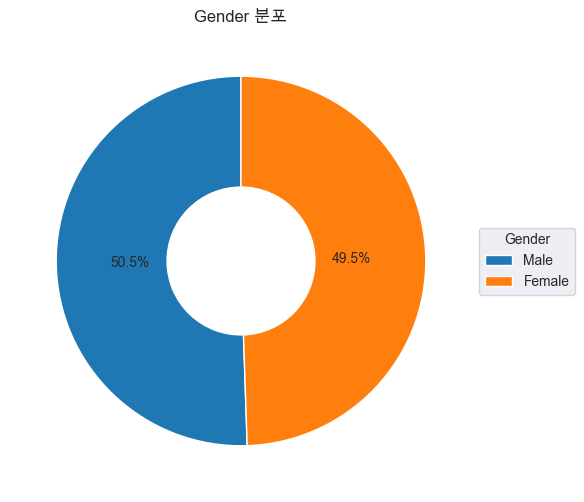

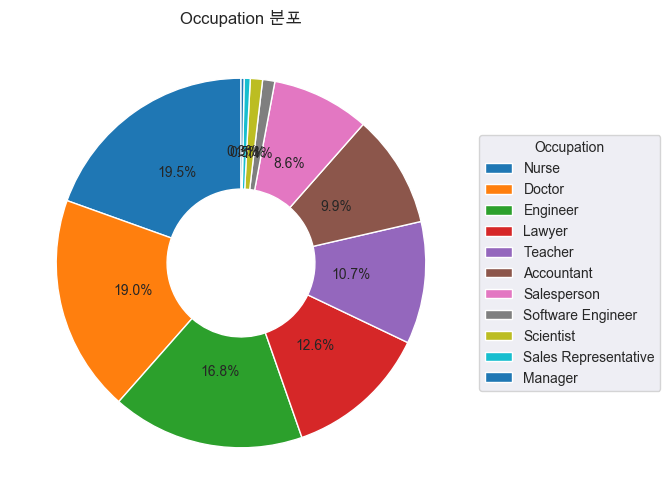

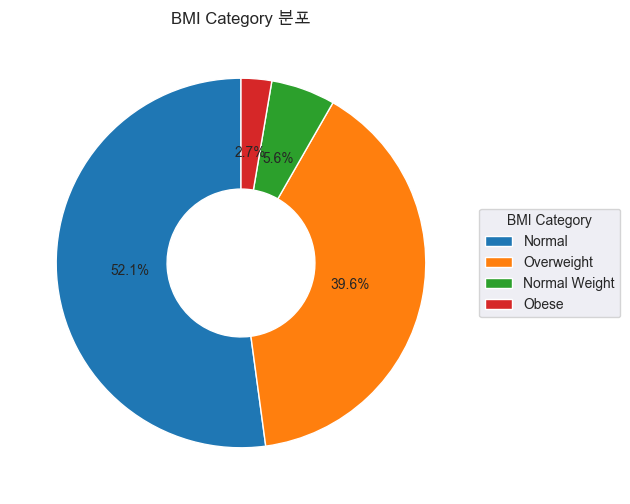

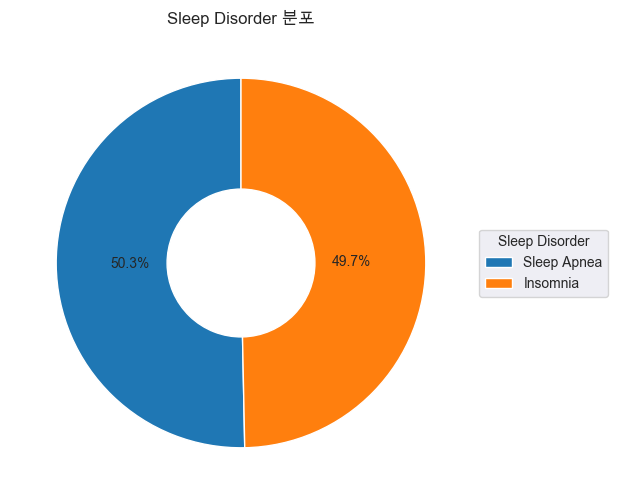

In [58]:
# 범주형 데이터 분리 (Blood Pressure 제외)
cat_cols = df.select_dtypes(include=['object']).columns.drop('Blood Pressure')

for col in cat_cols:
    plt.figure(figsize=(6, 6))
    values = df[col].value_counts()
    wedges, texts, autotexts = plt.pie(
        values,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.6)
    )
    plt.title(f"{col} 분포")
    plt.legend(wedges, values.index, title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

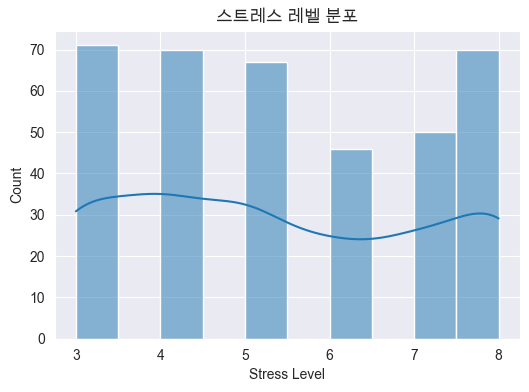

In [59]:
# Stress Level 분포
plt.figure(figsize=(6, 4))
sns.histplot(df['Stress Level'], bins=10, kde=True)
plt.title("스트레스 레벨 분포")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

## 주요 변수

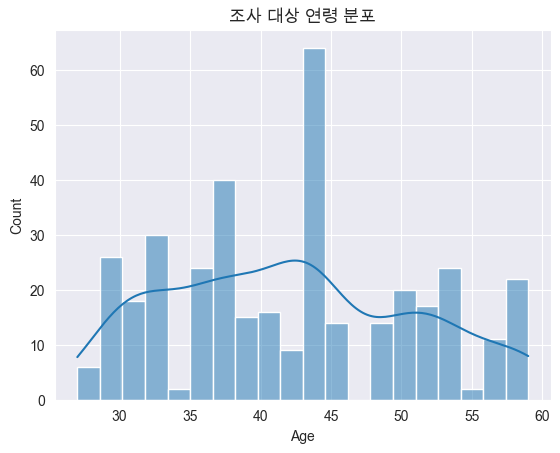

In [60]:
# 조사 대상 연령 분포
# 수치형 변수: 히스토그램 & 도수분포표(KDE)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('조사 대상 연령 분포')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

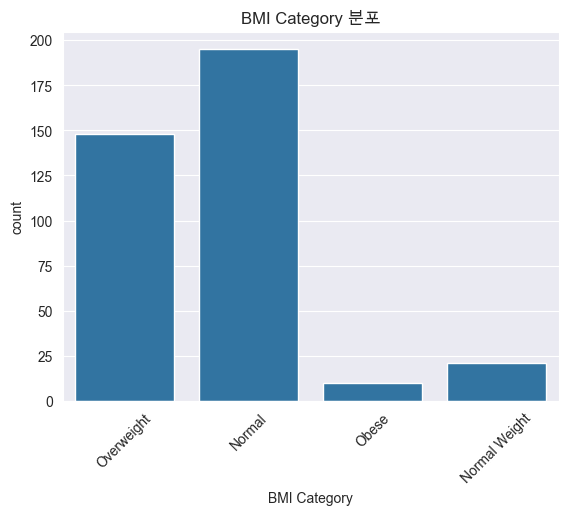

In [61]:
# BMI Category 분포
# Normal Weight 어떻게 전처리 할 것 인지에 따라 시각화 달라짐!!
# 범주형 변수 분포 (막대그래프)
sns.countplot(data=df, x='BMI Category')
plt.title('BMI Category 분포')
plt.xticks(rotation=45)
plt.colormaps()
plt.show()

### 1) Scatterplot --> 변수 간의 관계 느낌...!

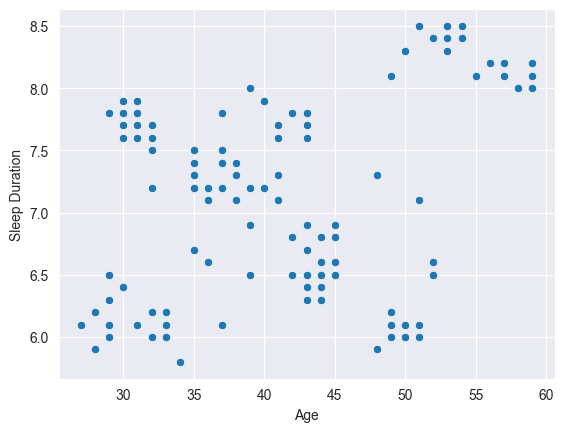

In [5]:
sns.scatterplot(data=df, x='Age', y='Sleep Duration')
plt.show()
# 나이에 따른 수면 시간 확인

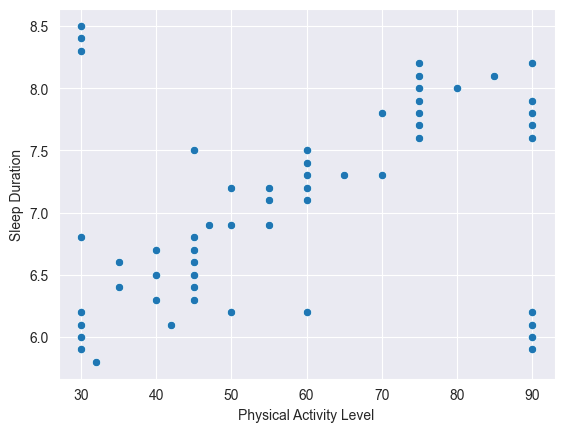

In [6]:
sns.scatterplot(data=df, x='Physical Activity Level', y='Sleep Duration')
plt.show()
# 활동량이 수면 시간과의 상관관계 확인

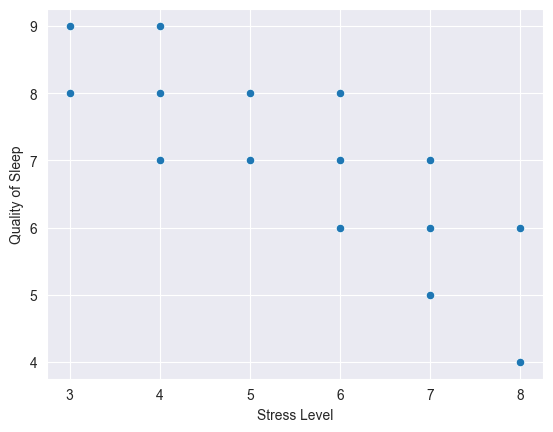

In [7]:
sns.scatterplot(data=df, x='Stress Level', y='Quality of Sleep')
plt.show()
# 스트레스가 수면의 질에 미치는 영향

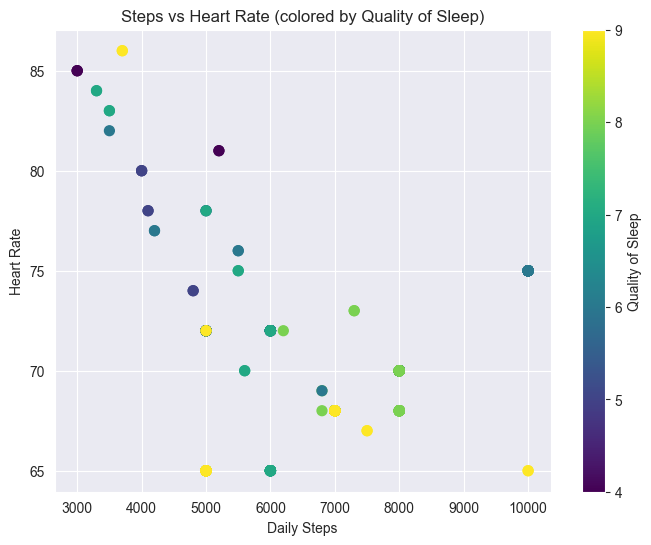

In [8]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Daily Steps'], df['Heart Rate'],
                      c=df['Quality of Sleep'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Quality of Sleep')
plt.xlabel('Daily Steps')
plt.ylabel('Heart Rate')
plt.title('Steps vs Heart Rate (colored by Quality of Sleep)')
plt.show()

# 심장박동과 일일 걸음수가 수면의 질에 끼치는 영향